# Predict car price

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('scrap price.csv')

In [6]:
df

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [7]:
df.shape

(205, 26)

In [8]:
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [9]:
df.info

<bound method DataFrame.info of       ID  symboling                      name fueltypes aspiration  \
0      1          3        alfa-romero giulia       gas        std   
1      2          3       alfa-romero stelvio       gas        std   
2      3          1  alfa-romero Quadrifoglio       gas        std   
3      4          2               audi 100 ls       gas        std   
4      5          2                audi 100ls       gas        std   
..   ...        ...                       ...       ...        ...   
200  201         -1           volvo 145e (sw)       gas        std   
201  202         -1               volvo 144ea       gas      turbo   
202  203         -1               volvo 244dl       gas        std   
203  204         -1                 volvo 246    diesel      turbo   
204  205         -1               volvo 264gl       gas      turbo   

    doornumbers      carbody drivewheels enginelocation  wheelbase  ...  \
0           two  convertible         rwd          fr

In [9]:
df.name.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [10]:
df.name.nunique()

147

In [11]:
NAME = []
for i in df.name:
    NAME.append(i.split(' ')[0])

In [12]:
x = pd.DataFrame(NAME, columns=['BRAND'])

In [13]:
x

,BRAND
0,alfa-romero
1,alfa-romero
2,alfa-romero
3,audi
4,audi
...,...
200,volvo
201,volvo
202,volvo
203,volvo


In [14]:
x.BRAND.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [15]:
for i in x.BRAND:
    if i== 'toyouta':
        x['BRAND'].replace('toyouta','toyota',inplace=True)
    elif i == 'vw' or i == 'vokswagen':
        x.BRAND.replace(i,'vokswagen',inplace=True)
    elif i == 'maxda':
        x.BRAND.replace('maxda','mazda',inplace=True)
    elif i == 'nissan':
        x.BRAND.replace('nissan','Nissan',inplace=True)
    elif i == 'porcshce':
        x.BRAND.replace('porcshce','porsche',inplace=True)

In [16]:
x.BRAND.nunique()

23

In [17]:
df2 = df.join(x)

In [18]:
df2.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'BRAND'],
      dtype='object')

In [19]:
df2.drop(['name','ID'],axis = 1,inplace=True)

In [20]:
df2

,symboling,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,BRAND
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [21]:
df2.columns

Index(['symboling', 'fueltypes', 'aspiration', 'doornumbers', 'carbody',
       'drivewheels', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'BRAND'],
      dtype='object')

In [22]:
df2.isna().sum()

symboling           0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
BRAND               0
dtype: int64

In [23]:
df2.dtypes

symboling             int64
fueltypes            object
aspiration           object
doornumbers          object
carbody              object
drivewheels          object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
BRAND                object
dtype: object

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fueltypes', ylabel='count'>

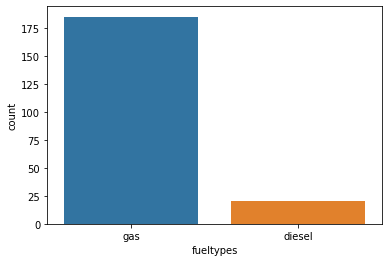

In [24]:
sns.countplot(df.fueltypes)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BRAND', ylabel='count'>

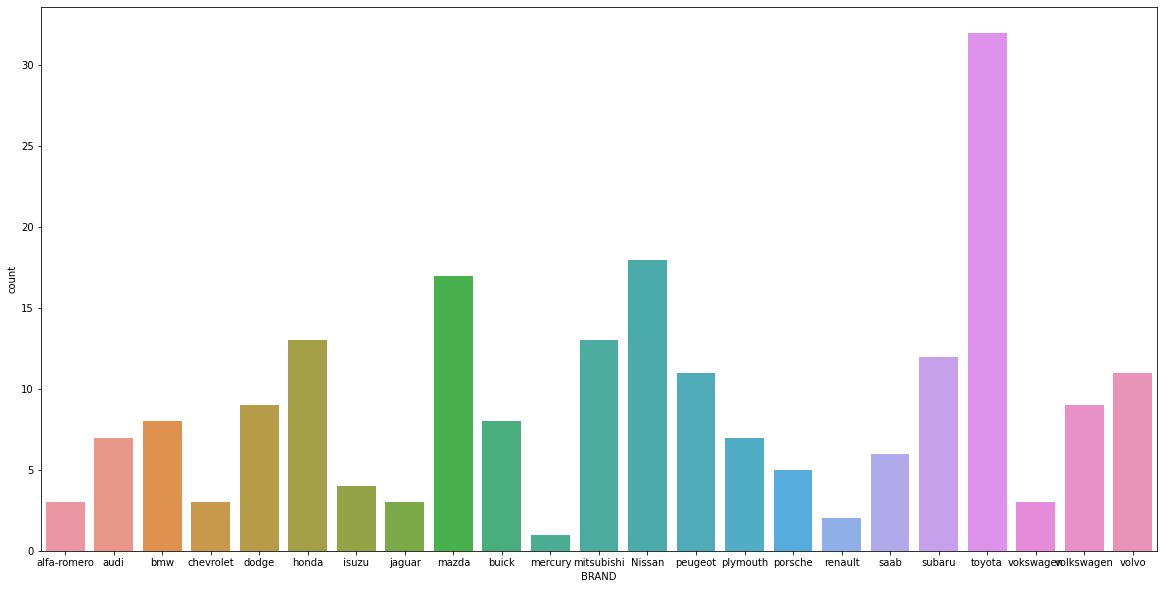

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(df2.BRAND)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='drivewheels', ylabel='count'>

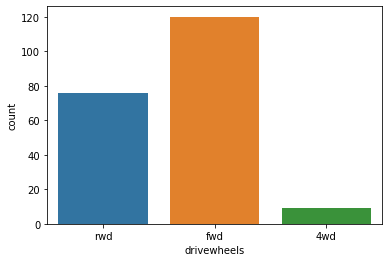

In [26]:
sns.countplot(df2.drivewheels)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

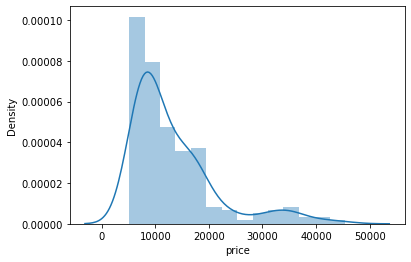

In [27]:
sns.distplot(df2.price)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cylindernumber', ylabel='count'>

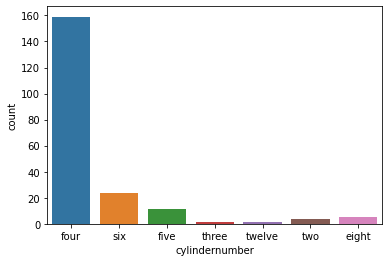

In [28]:
sns.countplot(df2.cylindernumber)

<AxesSubplot:>

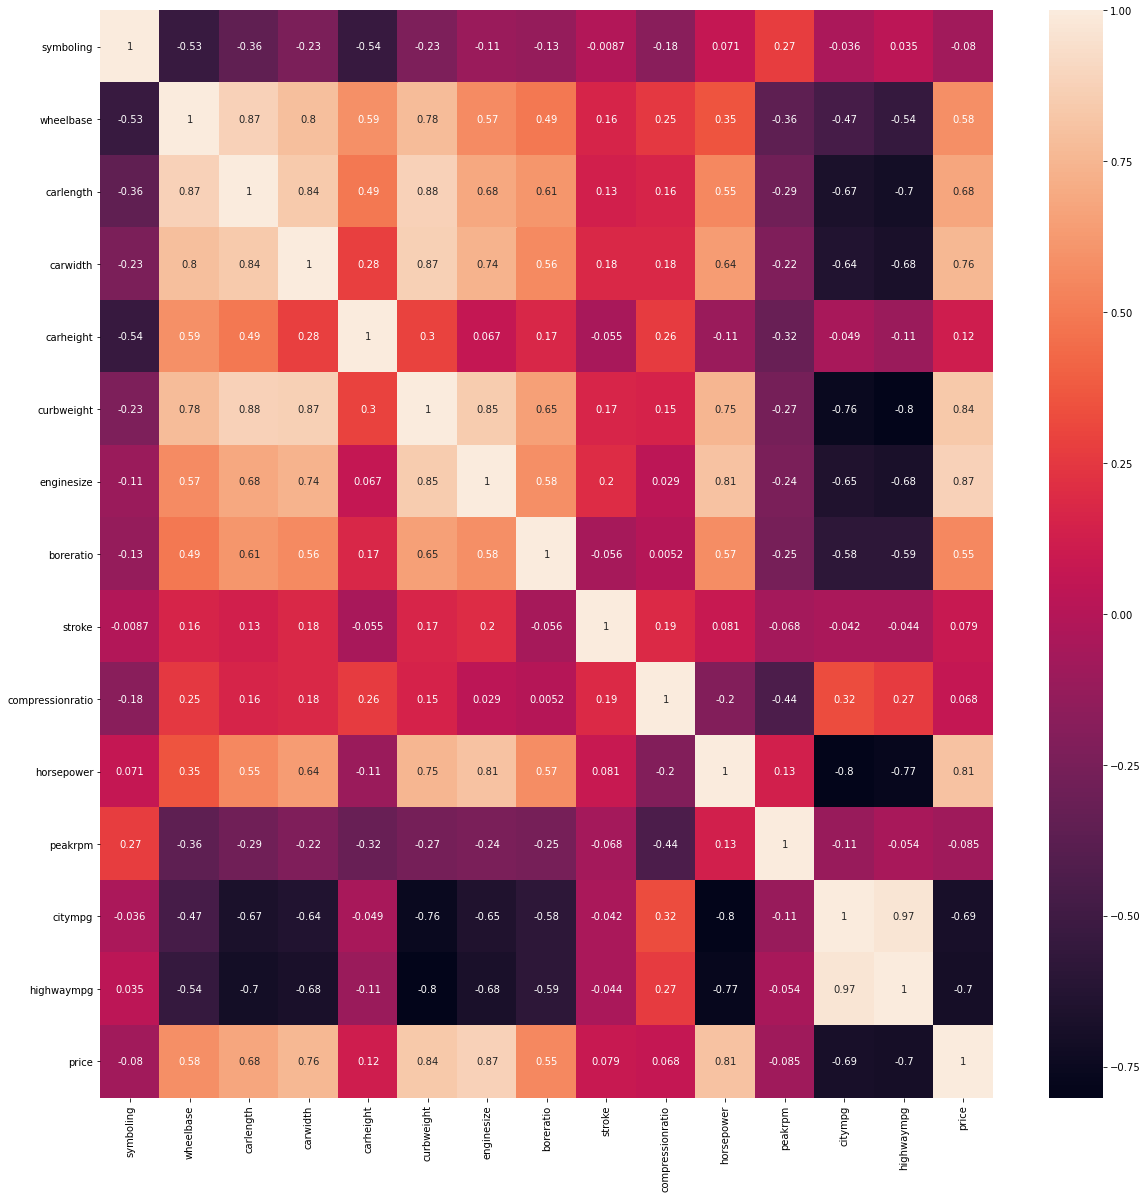

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),annot=True)

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()

In [32]:
for i in df2.columns:
    print(i)

symboling
fueltypes
aspiration
doornumbers
carbody
drivewheels
enginelocation
wheelbase
carlength
carwidth
carheight
curbweight
enginetype
cylindernumber
enginesize
fuelsystem
boreratio
stroke
compressionratio
horsepower
peakrpm
citympg
highwaympg
price
BRAND


In [33]:
df2.dtypes

symboling             int64
fueltypes            object
aspiration           object
doornumbers          object
carbody              object
drivewheels          object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
BRAND                object
dtype: object

In [34]:
df2.select_dtypes(include='object')
for x in df2.select_dtypes(include='object'):
    df2[x] = le.fit_transform(df2[x])

In [35]:
df2

,symboling,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,BRAND
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,5,3.78,3.15,9.5,114,5400,23,28,16845.0,22
201,-1,1,1,0,3,2,0,109.1,188.8,68.8,...,5,3.78,3.15,8.7,160,5300,19,25,19045.0,22
202,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,5,3.58,2.87,8.8,134,5500,18,23,21485.0,22
203,-1,0,1,0,3,2,0,109.1,188.8,68.9,...,3,3.01,3.40,23.0,106,4800,26,27,22470.0,22


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x = df2.drop(['price'],axis=1)
y = df2.price

In [38]:
x

,symboling,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,BRAND
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,1
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,1
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,1
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,2
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,141,5,3.78,3.15,9.5,114,5400,23,28,22
201,-1,1,1,0,3,2,0,109.1,188.8,68.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,22
202,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,173,5,3.58,2.87,8.8,134,5500,18,23,22
203,-1,0,1,0,3,2,0,109.1,188.8,68.9,...,145,3,3.01,3.40,23.0,106,4800,26,27,22


In [39]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [41]:
x_train.shape

(164, 24)

In [42]:
x_test.shape

(41, 24)

In [43]:
y_train.shape

(164,)

In [44]:
y_test.shape

(41,)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()

**fitting the linear regression model**

In [47]:
lr.fit(x_train,y_train)

LinearRegression()

In [48]:
lr.intercept_
#a0
#find best intercept value and coefficient value by changing these values

-56934.68691697932

In [49]:
lr.coef_
#a1

array([ 1.57728692e+02, -6.84884254e+03, -3.20295179e+02, -5.15444531e+02,
       -9.98774265e+02,  8.15309016e+02,  1.10811296e+04,  2.14179570e+02,
       -4.61117075e+01,  6.36956460e+02,  1.97306487e+02,  2.69914133e+00,
        1.83960245e+02,  2.37597913e+02,  9.24289723e+01,  7.79843390e+00,
       -1.94151918e+03, -2.73449093e+03, -3.59311336e+02,  2.24049068e+01,
        1.75138339e+00, -1.67418051e+02,  1.83740125e+02, -1.06882284e+02])

In [50]:
pred = lr.predict(x_test)

In [51]:
pred[0:5]

array([14848.41727157,  9138.9489047 , 10193.75126029, 14145.19022779,
        7850.10337933])

In [52]:
y_test[0:5]

29     12964.0
184     7995.0
177    11248.0
1      16500.0
79      7689.0
Name: price, dtype: float64

In [53]:
from sklearn.metrics import mean_squared_error,r2_score

In [54]:
mean_squared_error(pred,y_test)

6890048.8306167405

In [55]:
r2_score(pred,y_test) * 100

84.234499625079

In [56]:
x_test.iloc[0]
#actual values

symboling              3.0
fueltypes              1.0
aspiration             1.0
doornumbers            1.0
carbody                2.0
drivewheels            1.0
enginelocation         0.0
wheelbase             95.9
carlength            173.2
carwidth              66.3
carheight             50.2
curbweight          2811.0
enginetype             3.0
cylindernumber         2.0
enginesize           156.0
fuelsystem             4.0
boreratio              3.6
stroke                 3.9
compressionratio       7.0
horsepower           145.0
peakrpm             5000.0
citympg               19.0
highwaympg            24.0
BRAND                  6.0
Name: 29, dtype: float64

# user values for predicting price of car

In [57]:
lr.predict([[2,2,0.5,2,2,2,1,90,165,60,55,2500,1,2,90,4,3,2,10,115,6700,28,20,25]])

array([11439.25258975])

**SVR**

In [58]:
from sklearn.svm import SVR

In [59]:
SR = SVR(kernel='linear')

In [60]:
SR.fit(x_train,y_train)

SVR(kernel='linear')

In [61]:
prd1 = SR.predict(x_test)

In [63]:
mean_squared_error(prd1,y_test)

12048113.706081875